In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
salesTrain = pd.read_csv('../../../data/kaggle/predicFutureSales/sales_train.csv.gz', compression= 'gzip')
items = pd.read_csv('../../../data/kaggle/predicFutureSales/items.csv')
itemCategories = pd.read_csv('../../../data/kaggle/predicFutureSales/item_categories.csv')
shops = pd.read_csv('../../../data/kaggle/predicFutureSales/shops.csv')
submissionData = pd.read_csv('../../../data/kaggle/predicFutureSales/sample_submission.csv.gz', compression = 'gzip')
salesTrain.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [16]:
trainClean = salesTrain.drop(labels = ['date','item_price'], axis = 1)

In [17]:
trainClean.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
2,0,25,2552,-1.0
3,0,25,2554,1.0
4,0,25,2555,1.0


In [18]:
# group by month to get monthly count

trainClean = trainClean.groupby(by = ['item_id', 'shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index(name = 'item_cnt_month')
trainClean = trainClean[['item_id','shop_id','date_block_num','item_cnt_month']]
trainClean.head()

,item_id,shop_id,date_block_num,item_cnt_month
0,0,54,20,1.0
1,1,55,15,2.0
2,1,55,18,1.0
3,1,55,19,1.0
4,1,55,20,1.0


In [125]:
# select shop and item
shopNum = 5
itemNum = 5037

itemData = trainClean.loc[trainClean['shop_id'] == shopNum]
itemData = itemData.loc[itemData['item_id'] == itemNum]
itemData

,item_id,shop_id,date_block_num,item_cnt_month
400439,5037,5,20,1.0
400440,5037,5,22,1.0
400441,5037,5,23,2.0
400442,5037,5,24,2.0
400443,5037,5,28,1.0
400444,5037,5,29,1.0
400445,5037,5,30,1.0
400446,5037,5,31,3.0
400447,5037,5,32,1.0


Sales of item  5037  at shop  5


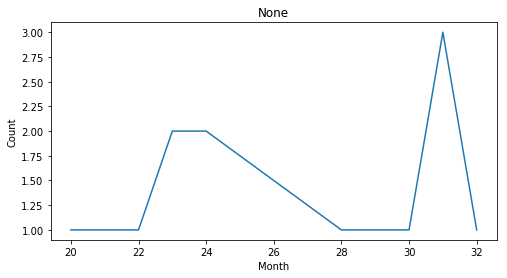

In [126]:
plt.figure(figsize=(8,4))
plt.title(print('Sales of item ', itemNum, ' at shop ', shopNum))
plt.xlabel('Month')
plt.ylabel('Count')
plt.plot(itemData['date_block_num'], itemData['item_cnt_month'])
plt.show()

In [127]:
# Prepare training data for all months
numMonths = salesTrain['date_block_num'].max() + 1
monthList = [i for i in range(numMonths)]
shop = list(np.ones(numMonths) * shopNum)
item = list(np.ones(numMonths) * itemNum)

monthFull = pd.DataFrame({'date_block_num':monthList, 'item_id':item,'shop_id':shop})

In [128]:
monthFull.head()

,date_block_num,item_id,shop_id
0,0,5037.0,5.0
1,1,5037.0,5.0
2,2,5037.0,5.0
3,3,5037.0,5.0
4,4,5037.0,5.0


In [129]:
itemTrainData = pd.merge(itemData, monthFull, how = 'right', on = ['shop_id', 'item_id', 'date_block_num'])
itemTrainData.sort_values(by = ['date_block_num'], inplace=True)
itemTrainData.fillna(0.0,inplace=True)
itemTrainData

,item_id,shop_id,date_block_num,item_cnt_month
9,5037,5,0,0.0
10,5037,5,1,0.0
11,5037,5,2,0.0
12,5037,5,3,0.0
13,5037,5,4,0.0
14,5037,5,5,0.0
15,5037,5,6,0.0
16,5037,5,7,0.0
17,5037,5,8,0.0
18,5037,5,9,0.0


In [130]:
# Add lag columns for training data
NUM_TAP = 5

for i in range(1,NUM_TAP+1):
    itemTrainData['T_'+str(i)] = itemTrainData['item_cnt_month'].shift(i)

itemTrainData.fillna(0.0, inplace=True)
itemTrainData.head()

,item_id,shop_id,date_block_num,item_cnt_month,T_1,T_2,T_3,T_4,T_5
9,5037,5,0,0.0,0.0,0.0,0.0,0.0,0.0
10,5037,5,1,0.0,0.0,0.0,0.0,0.0,0.0
11,5037,5,2,0.0,0.0,0.0,0.0,0.0,0.0
12,5037,5,3,0.0,0.0,0.0,0.0,0.0,0.0
13,5037,5,4,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
itemTrainData = itemTrainData[['shop_id','item_id','date_block_num', 'T_1','T_2','T_3','T_4','T_5', 'item_cnt_month']].reset_index()
itemTrainData.drop(labels = ['index'], axis = 1, inplace=True)
itemTrainData

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5,item_cnt_month
0,5,5037,0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5037,1,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5037,2,0.0,0.0,0.0,0.0,0.0,0.0
3,5,5037,3,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5037,4,0.0,0.0,0.0,0.0,0.0,0.0
5,5,5037,5,0.0,0.0,0.0,0.0,0.0,0.0
6,5,5037,6,0.0,0.0,0.0,0.0,0.0,0.0
7,5,5037,7,0.0,0.0,0.0,0.0,0.0,0.0
8,5,5037,8,0.0,0.0,0.0,0.0,0.0,0.0
9,5,5037,9,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
trainDF = itemTrainData[:-3]
valDF = itemTrainData[-3:]

xTrain, yTrain = trainDF.drop(labels=['item_cnt_month'], axis = 1), trainDF['item_cnt_month']
xVal, yVal = valDF.drop(labels = ['item_cnt_month'], axis = 1), valDF['item_cnt_month']

In [133]:
xTrain

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5
0,5,5037,0,0.0,0.0,0.0,0.0,0.0
1,5,5037,1,0.0,0.0,0.0,0.0,0.0
2,5,5037,2,0.0,0.0,0.0,0.0,0.0
3,5,5037,3,0.0,0.0,0.0,0.0,0.0
4,5,5037,4,0.0,0.0,0.0,0.0,0.0
5,5,5037,5,0.0,0.0,0.0,0.0,0.0
6,5,5037,6,0.0,0.0,0.0,0.0,0.0
7,5,5037,7,0.0,0.0,0.0,0.0,0.0
8,5,5037,8,0.0,0.0,0.0,0.0,0.0
9,5,5037,9,0.0,0.0,0.0,0.0,0.0


In [134]:
yTrain.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: item_cnt_month, dtype: float64

In [135]:
xVal

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5
31,5,5037,31,1.0,1.0,1.0,0.0,0.0
32,5,5037,32,3.0,1.0,1.0,1.0,0.0
33,5,5037,33,1.0,3.0,1.0,1.0,1.0


In [136]:
yVal

31    3.0
32    1.0
33    0.0
Name: item_cnt_month, dtype: float64

In [137]:
# Train model using Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(15, input_shape = (1,8)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics = ['accuracy'])

In [138]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1,1))
xTrainScaled = scaler.fit_transform(xTrain)
xValScaled = scaler.fit_transform(xVal)

In [139]:
# Reshape data for Keras
xTrainReshaped = xTrainScaled.reshape(xTrainScaled.shape[0], 1, xTrainScaled.shape[1])
xValReshaped = xValScaled.reshape(xValScaled.shape[0], 1 , xValScaled.shape[1])

In [140]:
model.fit(xTrainReshaped, yTrain, validation_data= (xValReshaped, yVal), epochs=70, batch_size=12, verbose=2, shuffle=False)

Train on 31 samples, validate on 3 samples
Epoch 1/70
 - 1s - loss: 0.4252 - acc: 0.7742 - val_loss: 3.3651 - val_acc: 0.3333
Epoch 2/70
 - 0s - loss: 0.4159 - acc: 0.7742 - val_loss: 3.3285 - val_acc: 0.3333
Epoch 3/70
 - 0s - loss: 0.4073 - acc: 0.7742 - val_loss: 3.2919 - val_acc: 0.3333
Epoch 4/70
 - 0s - loss: 0.3991 - acc: 0.7742 - val_loss: 3.2564 - val_acc: 0.3333
Epoch 5/70
 - 0s - loss: 0.3915 - acc: 0.7742 - val_loss: 3.2226 - val_acc: 0.3333
Epoch 6/70
 - 0s - loss: 0.3844 - acc: 0.7742 - val_loss: 3.1901 - val_acc: 0.3333
Epoch 7/70
 - 0s - loss: 0.3778 - acc: 0.7742 - val_loss: 3.1598 - val_acc: 0.3333
Epoch 8/70
 - 0s - loss: 0.3717 - acc: 0.7742 - val_loss: 3.1314 - val_acc: 0.3333
Epoch 9/70
 - 0s - loss: 0.3661 - acc: 0.7742 - val_loss: 3.1049 - val_acc: 0.3333
Epoch 10/70
 - 0s - loss: 0.3608 - acc: 0.7742 - val_loss: 3.0804 - val_acc: 0.3333
Epoch 11/70
 - 0s - loss: 0.3559 - acc: 0.7742 - val_loss: 3.0577 - val_acc: 0.3333
Epoch 12/70
 - 0s - loss: 0.3513 - acc: 0.

In [141]:
yPredict = model.predict(xValReshaped)

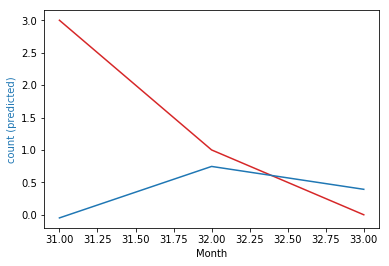

In [142]:
fig, ax1 = plt.subplots()

color = 'tab:Red'
ax1.plot(xVal['date_block_num'], yVal, color = color)
ax1.set_xlabel('Month')
ax1.set_ylabel('Count (Actual)')

ax2 = ax1
color = 'tab:blue'
ax2.plot(xVal['date_block_num'], yPredict, color = color)
ax2.set_ylabel('count (predicted)', color = color)

plt.show()

In [143]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(yVal, yPredict))

print('Val RMSE: %1.3f' % rmse)

Val RMSE: 1.781
